# Problem Description

Imagine needing to simplify your machine learning model for real-time predictions in a web or mobile application, improve its accuracy, and reduce overfitting. If the model has a large number of features, users would have to input all that data to get predictions—even if some of the features aren’t useful. 

For example, if the dataset has 30 features (like the dataset used for this project), users would need to provide all 30 in the application, which could be overwhelming and negatively impact the model's performance. 

This is where feature selection becomes essential! By choosing only the most relevant features, we can make the model more efficient, faster, and easier to use, while avoiding unnecessary noise that can affect accuracy.

Hence, this project aims to compare two feature selection methods— **Evolutionary Feature Selection (EFS) and Ant Colony Optimization (ACO).**

To explore the flexibility of the techniques mentioned above, three machine learning classifiers are used- They include; **Random Forest, KNN and SVM**

Four evaluation metrics- **Accuracry, Precision, Recall and F1 score** were used to compare the performance of the algorithms

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from deap import base, creator, tools, algorithms
from sklearn.tree import export_text



pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# Reading dataset

This project made use of the popular Wisconsin Diagnostic Breast Cancer Dataset available at http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

The Wisconsin Breast Cancer dataset is a popular dataset used for binary classification tasks, where the goal is to predict whether a tumor is benign or malignant based on features computed from digitized images of fine needle aspirates (FNAs) of breast masses. It includes 30 features that describe the characteristics of the cell nuclei present in the image, such as radius, texture, and smoothness.

In [133]:
df = pd.read_csv(r"/Users/mac/Downloads/Project/Wisconsin Diagnostic Breast Cancer (WDBC).csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [46]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# Preprocessing and Brief EDA

In [134]:
df = df.drop(columns = ['Unnamed: 32', 'id'])

The two columns above were dropped 😮‍💨

In [10]:
df.shape

(569, 31)

In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Great, the dataset contains zero null values! 🥳🥳

In [13]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

The data types are all in perfect format. No cause for alarm😁😁😁

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


The summary statistics above show varying ranges for features, with 'area_mean' and 'area_worst' having the largest values. Some features, like 'concavity_mean' and 'concave points_mean,' have zero minimum values, indicating possible outliers or sparsity 🥲. This highlights the need for careful analysis of feature distributions before modeling. This will be done through using boxplots for outlier detection😊.


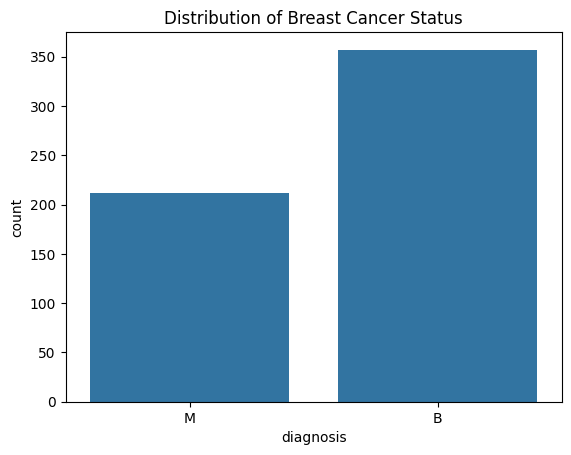

In [15]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Breast Cancer Status')
plt.show()

The plot above shows the distribution of the Malignant cases, and the Benign cases in our dataset. Although, there is a notable level of imbalance in the dataset, there is no upsampling technique considered at this point. 

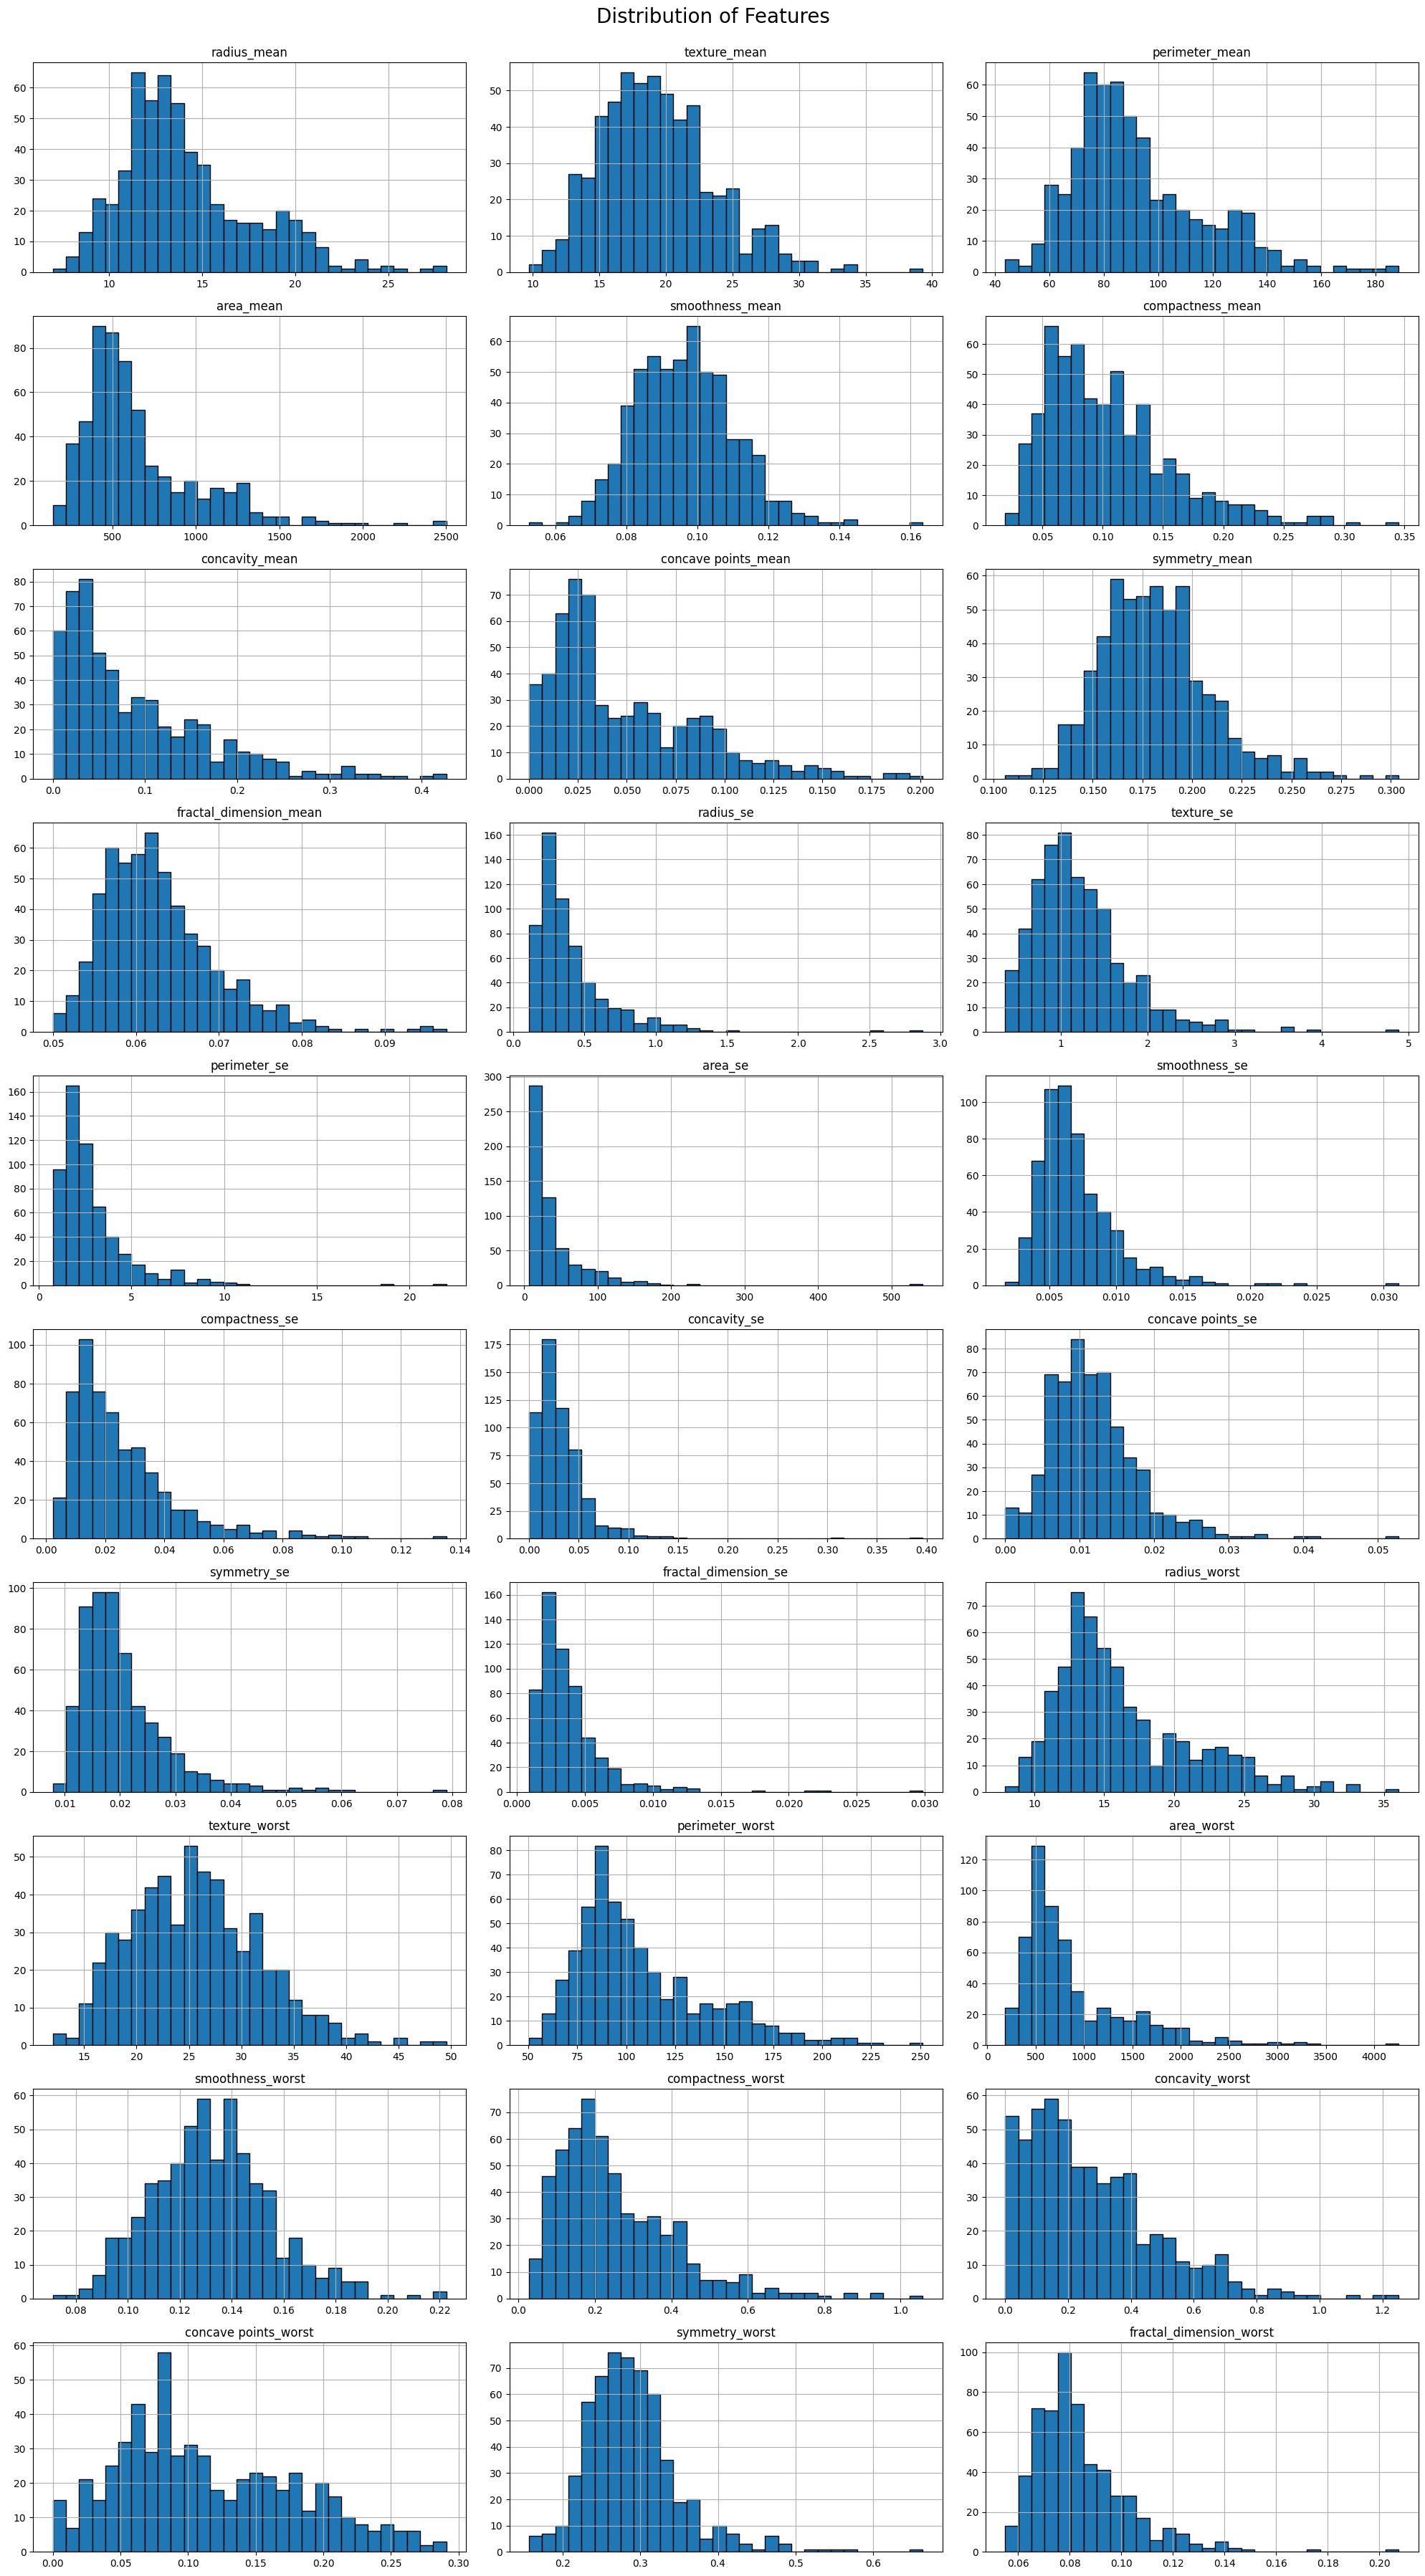

In [49]:
num_columns = 3

df.hist(bins=30, figsize=(20, 40), layout=(int(len(df.columns)/num_columns)+1, num_columns), edgecolor='black')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Distribution of Features', fontsize=20)
plt.show()

The distribution plots above shows how the features are distributed. While some of the features such as 'smoothness mean' are approximately normally distributed, most of the features are skewed to the right.

# Outlier detection and replacement

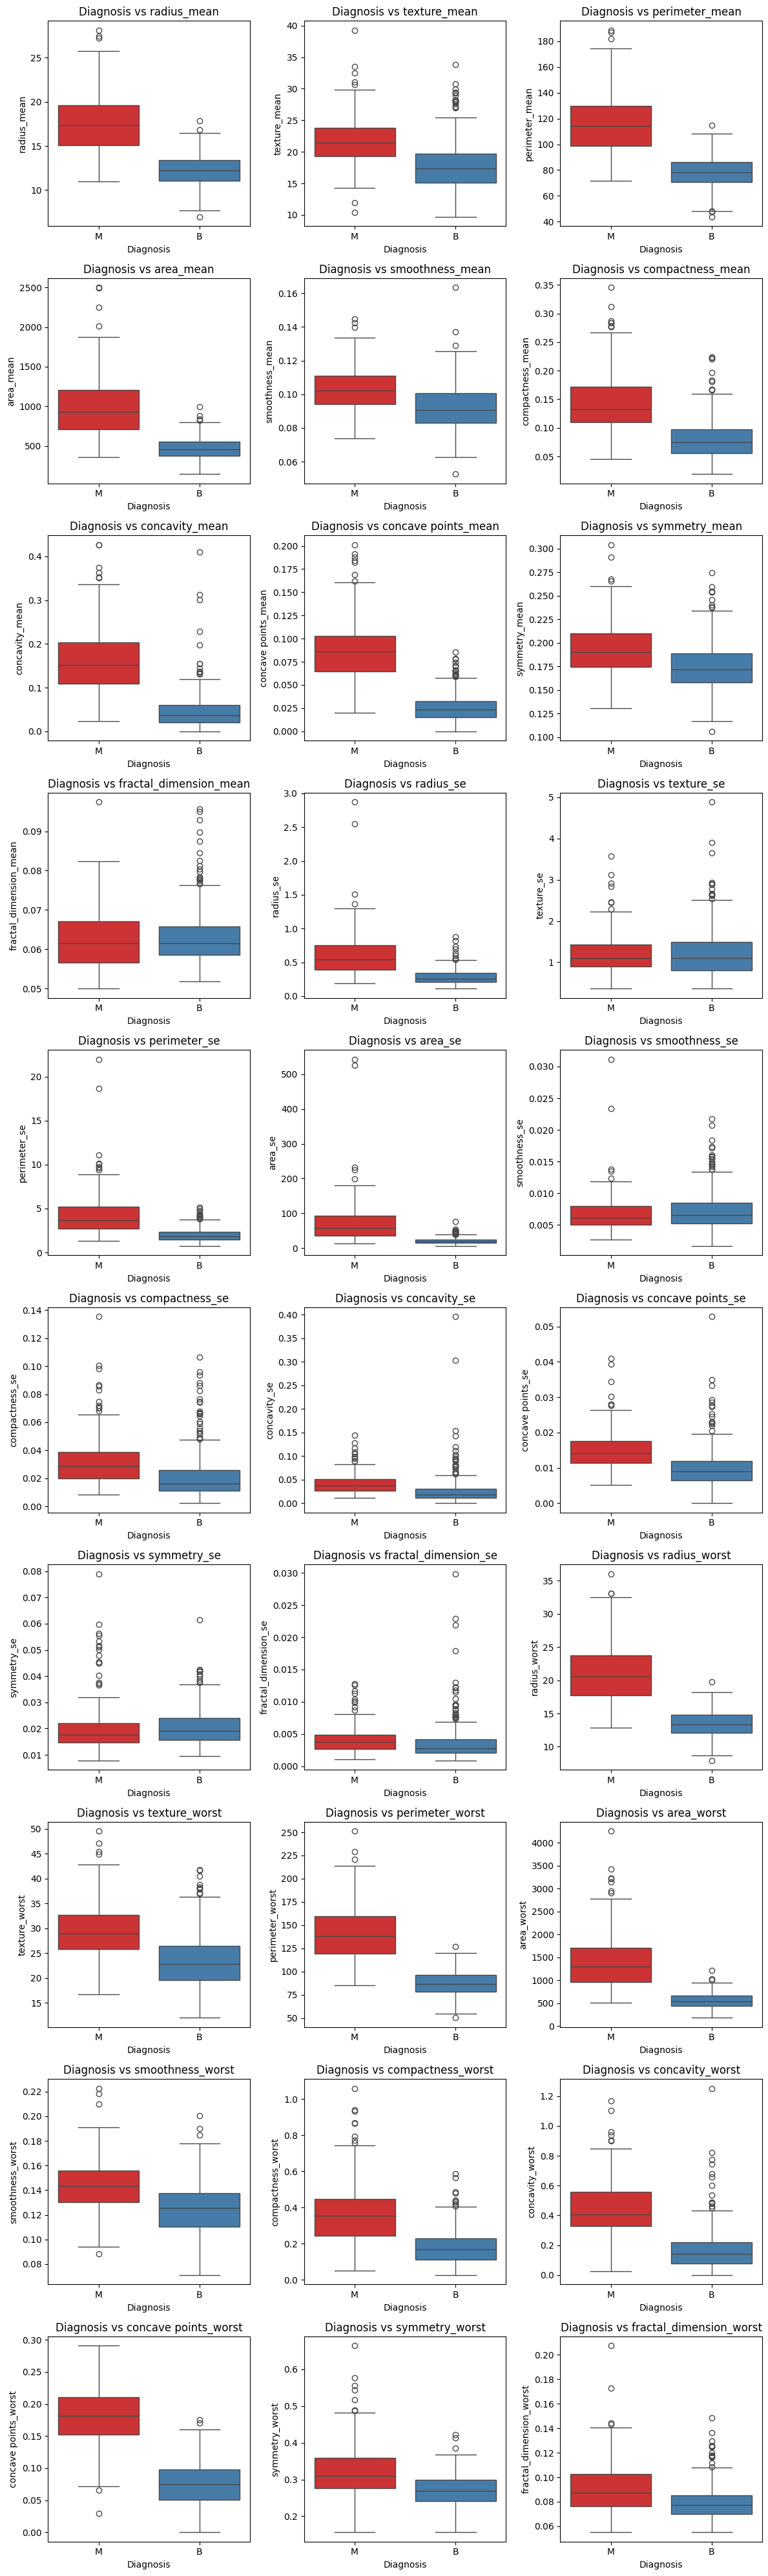

In [45]:
features = df.columns.drop('diagnosis')  
num_features = len(features)

ncols = 3
nrows = (num_features + ncols - 1) // ncols  

# subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))  
axes = axes.flatten()  

for i, feature in enumerate(features):
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Diagnosis vs {feature}')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

The boxplots above indicates the presence of outliers in the faetures. To avoid loss of data points, the outleirs are replaced with mean values

In [135]:
def replace_outliers_with_mean(df, feature_columns):
    
    df_cleaned = df.copy()
    
    for feature in feature_columns:
        # Calculating Q1 and Q3
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        #  mean of the column
        mean_value = df_cleaned[feature].mean()
        
        # Replace outliers with the mean value
        df_cleaned[feature] = np.where(
            (df_cleaned[feature] < lower_bound) | (df_cleaned[feature] > upper_bound),
            mean_value,
            df_cleaned[feature]
        )
    
    return df_cleaned


In [27]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [136]:
features = [
     'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
]
df_cleaned = replace_outliers_with_mean(df, features)

# Defining X and y, Splitting dataset and Standardizing

In [137]:
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Convert diagnosis labels to binary

In [32]:
X.shape

(569, 30)

In [33]:
y.shape

(569,)

In [138]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
#Standardization using StandardScaler

In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementing Evolutionary Feature Selection (EFS) and Ant Colony Optimization (ACO) for each of the ML Classifiers

## EFS for Random Forest Classifier

In [140]:
def evaluate_individual(individual):
    efs_selected_features = [i for i, gene in enumerate(individual) if gene == 1]
    if len(efs_selected_features) == 0:
        return 0,  # Penalize individuals with no features selected

    X_train_selected = X_train_scaled[:, efs_selected_features]
    scores = cross_val_score(RandomForestClassifier(random_state=42), X_train_selected, y_train, cv=3, scoring='accuracy')
    
    return scores.mean(),  

# Initialize the DEAP framework
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]
efs_selected_features = [i for i, gene in enumerate(best_individual) if gene == 1]

# Print the selected features
print(f"Selected Features: {X.columns[efs_selected_features].tolist()}")


Selected Features: ['texture_mean', 'concavity_mean', 'fractal_dimension_mean', 'compactness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


This code implements a feature selection process using a genetic algorithm with the DEAP framework.
The `evaluate_individual` function evaluates a binary chromosome (individual) where each gene represents 
   whether a feature is selected (1) or not (0). It uses cross-validation accuracy of a RandomForestClassifier 
   on the selected features to measure fitness. Individuals with no selected features are penalized with a score of 0.

The DEAP framework is initialized to maximize accuracy (FitnessMax), with individuals represented as lists 
   of binary values. The population consists of 50 individuals, and genetic operations like crossover, mutation, 
   and selection (tournament) are applied.

The evolutionary process runs for 40 generations using simple evolutionary strategy `eaSimple`, 
   with a 50% crossover probability and 20% mutation probability.

After the evolution, the best individual is selected, and the indices of selected features are printed.

This same process was subsequently repeated for SVM and KNN classifiers under their respective EFS sections.


## Fitting RF Classifier with selected EFS selected features

In [141]:
X_train_selected = X_train_scaled[:, efs_selected_features]
X_test_selected = X_test_scaled[:, efs_selected_features]

rf_model_efs = RandomForestClassifier(random_state=42)
rf_model_efs.fit(X_train_selected, y_train)

# Make predictions
y_pred_best = rf_model_efs.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best) * 100
precision_best = precision_score(y_test, y_pred_best) * 100
recall_best = recall_score(y_test, y_pred_best) * 100
f1_best = f1_score(y_test, y_pred_best) * 100

# Print metrics
print(f"Accuracy (Best Features): {accuracy_best:.2f}%")
print(f"Precision (Best Features): {precision_best:.2f}%")
print(f"Recall (Best Features): {recall_best:.2f}%")
print(f"F1-Score (Best Features): {f1_best:.2f}%")


Accuracy (Best Features): 96.49%
Precision (Best Features): 97.56%
Recall (Best Features): 93.02%
F1-Score (Best Features): 95.24%


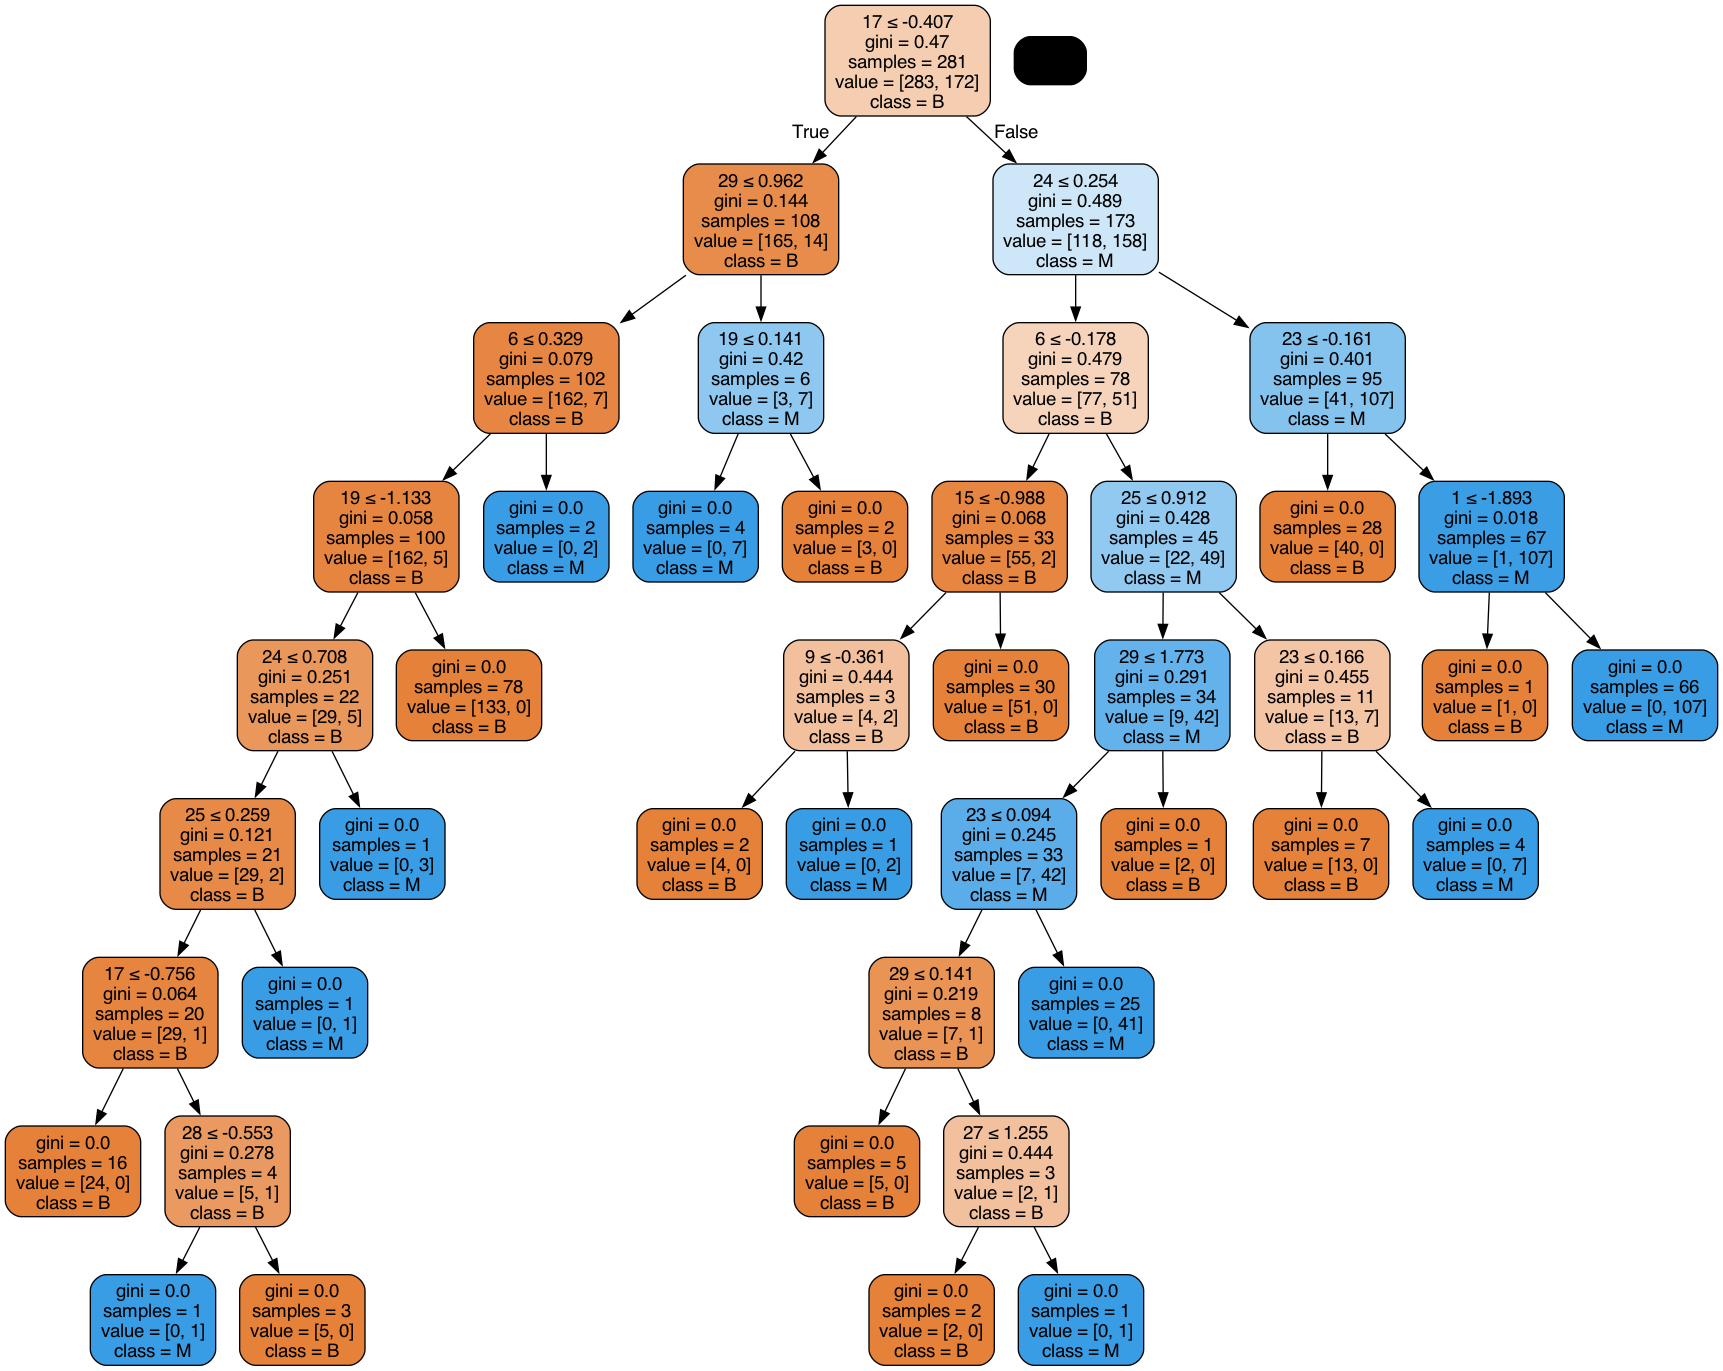

In [148]:
efs_tree = rf_model_efs.estimators_[0] 

max_depth = 15  # Adjustable 
dot_data = export_graphviz(efs_tree, out_file=None, 
                           feature_names=efs_selected_features,  
                           class_names=['B', 'M'], 
                           filled=True, rounded=True,  
                           special_characters=True, 
                           max_depth=max_depth)  

# Convert to image
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the image
Image(graph.create_png())


## ACO for RF Classifier

In [143]:
def ant_colony_optimization(X, y, num_ants=5, num_features=5, max_iter=50, evaporation_rate=15, alpha=1, beta=2):
    num_features_total = X.shape[1]
    pheromones = np.ones(num_features_total)  # Initialize pheromones
    heuristic_info = np.var(X, axis=0)  

    best_features = []
    best_score = -np.inf
    
    for iteration in range(max_iter):
        all_solutions = []
        scores = []
        
        for ant in range(num_ants):
            # Probability calculation using pheromones and heuristic info
            probabilities = (pheromones ** alpha) * (heuristic_info ** beta)
            probabilities /= probabilities.sum()

            aco_selected_features = np.random.choice(range(num_features_total), num_features, replace=False, p=probabilities)
            all_solutions.append(aco_selected_features)
            
            # Evaluate the selected features using cross-validation
            X_selected = X[:, aco_selected_features]
            score = np.mean(cross_val_score(RandomForestClassifier(random_state = 42), X_selected, y, cv=3))  
            
            scores.append(score)
            if score > best_score:
                best_score = score
                best_features = aco_selected_features

        # Update pheromones: Evaporation and Intensification
        pheromones *= (1 - evaporation_rate)  # Evaporation
        for i, solution in enumerate(all_solutions):
            pheromones[solution] += scores[i] / max(scores) 
    
    return best_features

# Apply the ACO
aco_selected_features = ant_colony_optimization(X.values, y.values, num_ants=5, num_features=5, max_iter=50, evaporation_rate=15)

# Convert the indices of the selected features back to feature names
selected_feature_names = X.columns[aco_selected_features]
print("Selected Features by ACO:")
print(selected_feature_names)

Selected Features by ACO:
Index(['area_worst', 'area_mean', 'perimeter_mean', 'perimeter_worst',
       'texture_worst'],
      dtype='object')


The `ant_colony_optimization` function performs feature selection using an Ant Colony Optimization (ACO) algorithm.
The initialization initializes pheromone levels (influence factors for feature selection) and heuristic information (variance of each feature) to guide the ants' feature choices.

For a specified number of iterations:
   - Each ant selects a subset of features based on pheromone levels and heuristic information, with the selection probabilities determined by their relative importance.
   - The selected feature subsets are evaluated using cross-validation with a classifier (RandomForest in this case) to assess their performance.
   - Pheromone levels are updated based on the performance of each subset, with evaporation to reduce the influence of old pheromones 
     and intensification to reinforce good selections.

The output returns the best feature subset found during the iterations. This subset is then used to identify the corresponding feature names from the original dataset.

This was repeated for KNN and SVC classifiers under their respective ACO sections

## Fitting RF classifier with ACO selected features

In [144]:
X_train_aco = X_train_scaled[:, aco_selected_features]
X_test_aco = X_test_scaled[:, aco_selected_features]

rf_model_aco = RandomForestClassifier(random_state=42)
rf_model_aco.fit(X_train_aco, y_train)

# Make predictions
y_pred_aco = rf_model_aco.predict(X_test_aco)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_aco) * 100
precision_best = precision_score(y_test, y_pred_aco) * 100
recall_best = recall_score(y_test, y_pred_aco) * 100
f1_best = f1_score(y_test, y_pred_aco) * 100

# Print metrics
print(f"Accuracy (Best Features): {accuracy_best:.2f}%")
print(f"Precision (Best Features): {precision_best:.2f}%")
print(f"Recall (Best Features): {recall_best:.2f}%")
print(f"F1-Score (Best Features): {f1_best:.2f}%")


Accuracy (Best Features): 93.86%
Precision (Best Features): 97.37%
Recall (Best Features): 86.05%
F1-Score (Best Features): 91.36%


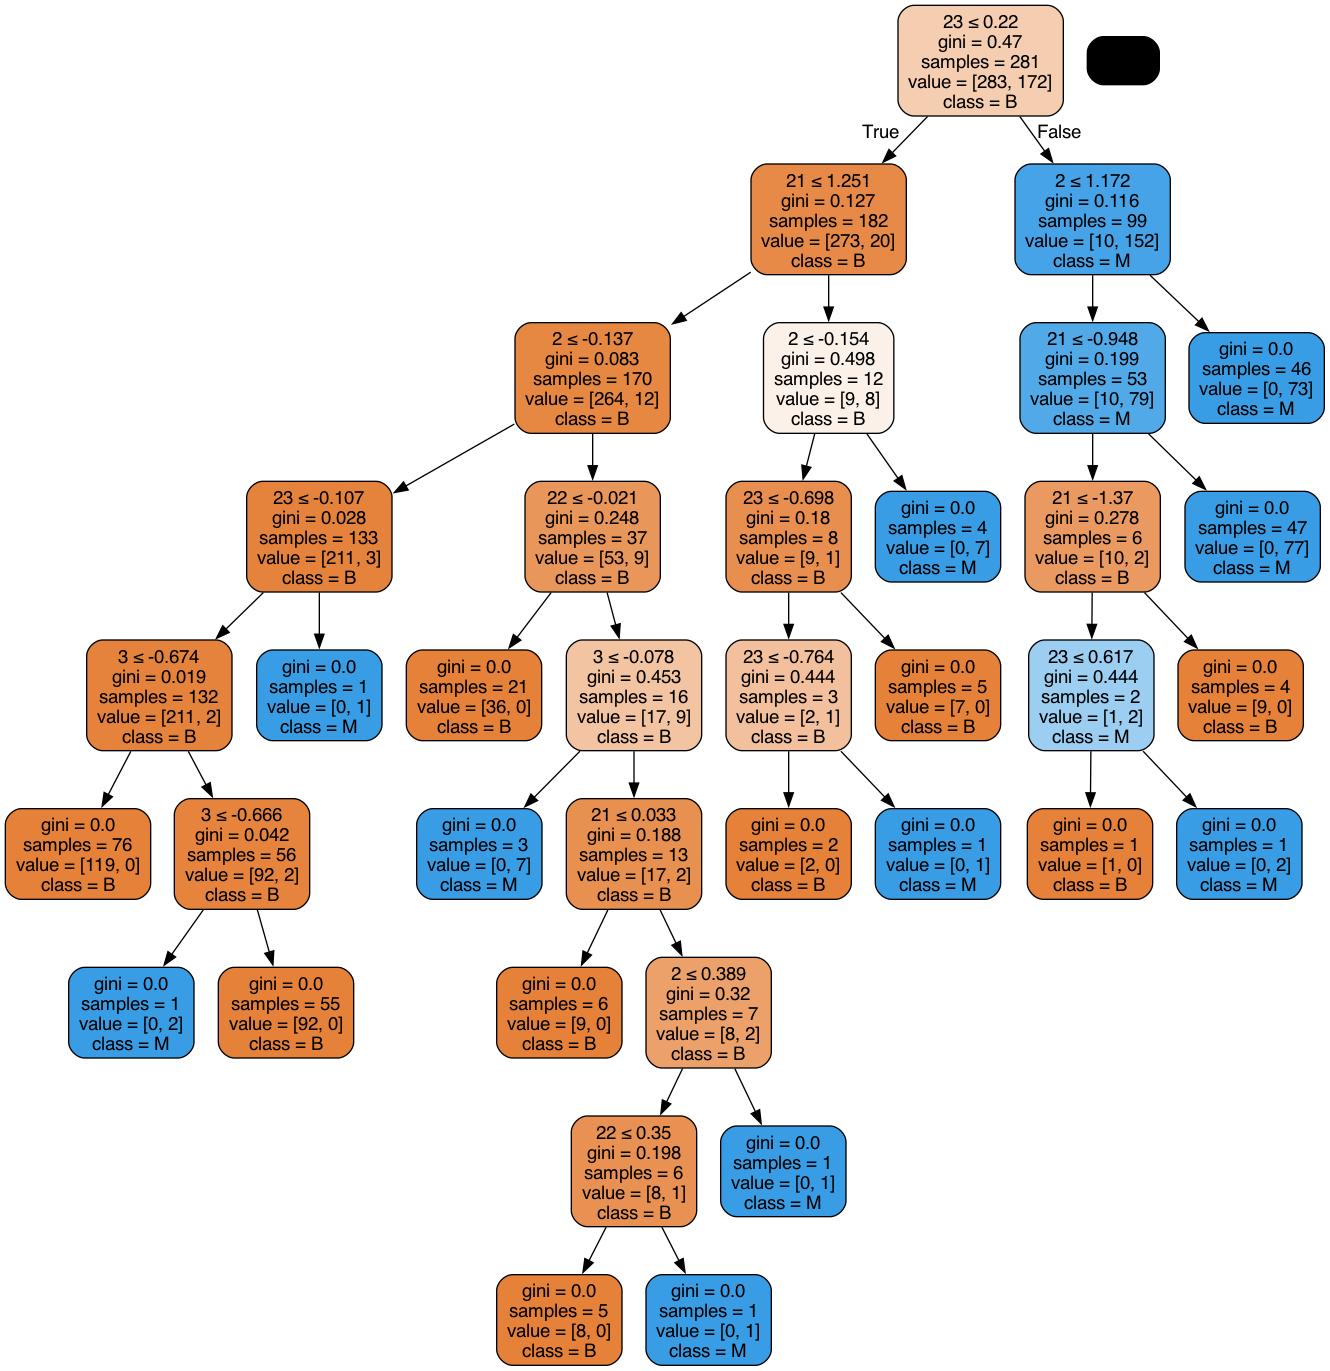

In [149]:
aco_tree = rf_model_aco.estimators_[0] 
max_depth = 15  

# Export as dot file with customization
dot_data = export_graphviz(aco_tree, out_file=None, 
                           feature_names=aco_selected_features,  
                           class_names=['B', 'M'],  
                           filled=True, rounded=True,  
                           special_characters=True, 
                           max_depth=max_depth)  

# Convert to image
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display the image
Image(graph.create_png())


## EFS for KNN classifier

In [150]:
def evaluate_individual(individual):
    efs_selected_features = [i for i, gene in enumerate(individual) if gene == 1]
    if len(efs_selected_features) == 0:
        return 0,  

    X_train_selected = X_train_scaled[:, efs_selected_features]
    scores = cross_val_score(KNeighborsClassifier(), X_train_selected, y_train, cv=3, scoring='accuracy')
    
    return scores.mean(),  

# Initialize the DEAP framework
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]
efs_selected_features = [i for i, gene in enumerate(best_individual) if gene == 1]

# Print the selected features
print(f"Selected Features: {X.columns[efs_selected_features].tolist()}")


Selected Features: ['texture_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'concave points_worst']


## Fitting the KNN classifier with EFS selected features

In [151]:
X_train_selected = X_train_scaled[:, efs_selected_features]
X_test_selected = X_test_scaled[:, efs_selected_features]

knn_model_efs = KNeighborsClassifier(n_neighbors=5)
knn_model_efs.fit(X_train_selected, y_train)

# Make predictions
y_pred_best = knn_model_efs.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best) * 100
precision_best = precision_score(y_test, y_pred_best) * 100
recall_best = recall_score(y_test, y_pred_best) * 100
f1_best = f1_score(y_test, y_pred_best) * 100

# Print metrics
print(f"Accuracy (Best Features): {accuracy_best:.2f}%")
print(f"Precision (Best Features): {precision_best:.2f}%")
print(f"Recall (Best Features): {recall_best:.2f}%")
print(f"F1-Score (Best Features): {f1_best:.2f}%")


Accuracy (Best Features): 96.49%
Precision (Best Features): 95.35%
Recall (Best Features): 95.35%
F1-Score (Best Features): 95.35%


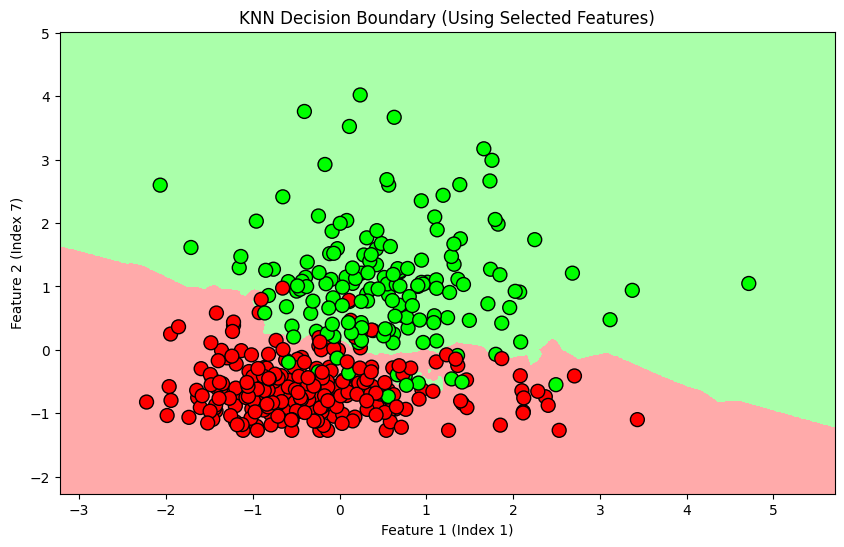

In [118]:
if len(efs_selected_features) >= 2:
    # Selecting the first two features for visualization
    feature_1_index = efs_selected_features[0]
    feature_2_index = efs_selected_features[1]

    X_train_vis = X_train_scaled[:, [feature_1_index, feature_2_index]]
    X_test_vis = X_test_scaled[:, [feature_1_index, feature_2_index]]

    # reTrain KNN model on selected features
    knn_visual = KNeighborsClassifier(n_neighbors=5)
    knn_visual.fit(X_train_vis, y_train)

    # Create a mesh grid for plotting decision boundary
    x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
    y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on mesh grid
    Z = knn_visual.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=100)

    plt.xlabel(f'Feature 1 (Index {feature_1_index})')
    plt.ylabel(f'Feature 2 (Index {feature_2_index})')
    plt.title('KNN Decision Boundary (Using Selected Features)')
    plt.show()

else:
    print("Not enough features selected for 2D visualization.")


## ACO with KNN classifier

In [152]:
def ant_colony_optimization(X, y, num_ants=5, num_features=5, max_iter=50, evaporation_rate=15, alpha=1, beta=2):
    num_features_total = X.shape[1]
    pheromones = np.ones(num_features_total)  # Initialize pheromones
    heuristic_info = np.var(X, axis=0)  

    best_features = []
    best_score = -np.inf
    
    for iteration in range(max_iter):
        all_solutions = []
        scores = []
        
        for ant in range(num_ants):
            # Probability calculation using pheromones and heuristic info
            probabilities = (pheromones ** alpha) * (heuristic_info ** beta)
            probabilities /= probabilities.sum()

            aco_selected_features = np.random.choice(range(num_features_total), num_features, replace=False, p=probabilities)
            all_solutions.append(aco_selected_features)
            
            # Evaluate the selected features using cross-validation
            X_selected = X[:, aco_selected_features]
            score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_selected, y, cv=3))  
            
            scores.append(score)
            if score > best_score:
                best_score = score
                best_features = aco_selected_features

        # Update pheromones: Evaporation and Intensification
        pheromones *= (1 - evaporation_rate)  # Evaporation
        for i, solution in enumerate(all_solutions):
            pheromones[solution] += scores[i] / max(scores)  
    
    return best_features

# Apply the ACO
aco_selected_features = ant_colony_optimization(X.values, y.values, num_ants=5, num_features=5, max_iter=50, evaporation_rate=15)

# Convert the indices of the selected features back to feature names
selected_feature_names = X.columns[aco_selected_features]
print("Selected Features by ACO:")
print(selected_feature_names)

Selected Features by ACO:
Index(['area_worst', 'area_mean', 'perimeter_worst', 'area_se',
       'texture_worst'],
      dtype='object')


## Fitting KNN classifier with ACO selected features

In [153]:
X_train_selected = X_train_scaled[:, aco_selected_features]
X_test_selected = X_test_scaled[:, aco_selected_features]

knn_model_aco = KNeighborsClassifier(n_neighbors=5)
knn_model_aco.fit(X_train_selected, y_train)

# Make predictions
y_pred_best = knn_model_aco.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best) * 100
precision_best = precision_score(y_test, y_pred_best) * 100
recall_best = recall_score(y_test, y_pred_best) * 100
f1_best = f1_score(y_test, y_pred_best) * 100

# Print metrics
print(f"Accuracy (Best Features): {accuracy_best:.2f}%")
print(f"Precision (Best Features): {precision_best:.2f}%")
print(f"Recall (Best Features): {recall_best:.2f}%")
print(f"F1-Score (Best Features): {f1_best:.2f}%")


Accuracy (Best Features): 94.74%
Precision (Best Features): 95.12%
Recall (Best Features): 90.70%
F1-Score (Best Features): 92.86%


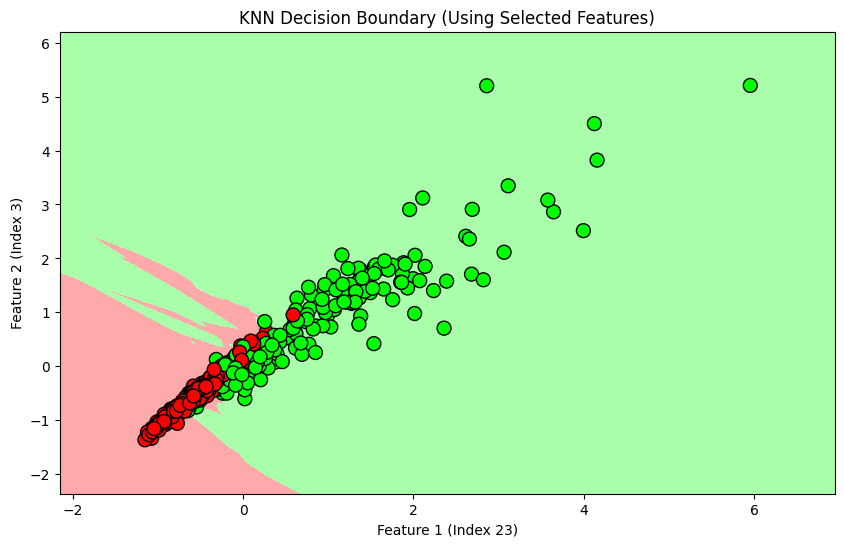

In [194]:
if len(efs_selected_features) >= 2:
    # Selecting the first two features for visualization
    feature_1_index = aco_selected_features[0]
    feature_2_index = aco_selected_features[1]

    X_train_vis = X_train_scaled[:, [feature_1_index, feature_2_index]]
    X_test_vis = X_test_scaled[:, [feature_1_index, feature_2_index]]

    # reTraining the  KNN model on selected features
    knn_visual = KNeighborsClassifier(n_neighbors=5)
    knn_visual.fit(X_train_vis, y_train)

    # Creating a mesh grid for plotting decision boundary
    x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
    y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on mesh grid
    Z = knn_visual.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=100)

    plt.xlabel(f'Feature 1 (Index {feature_1_index})')
    plt.ylabel(f'Feature 2 (Index {feature_2_index})')
    plt.title('KNN Decision Boundary (Using Selected Features)')
    plt.show()

else:
    print("Not enough features selected for 2D visualization. Please ensure at least two features are selected.")


## EFS with SVM classifier

In [156]:
def evaluate_individual(individual):
    efs_selected_features = [i for i, gene in enumerate(individual) if gene == 1]
    if len(efs_selected_features) == 0:
        return 0,  

    X_train_selected = X_train_scaled[:, efs_selected_features]
    scores = cross_val_score(SVC(), X_train_selected, y_train, cv=3, scoring='accuracy')
    
    return scores.mean(),

# Initialize the DEAP framework
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]
efs_selected_features = [i for i, gene in enumerate(best_individual) if gene == 1]

# Print the selected features
print(f"Selected Features: {X.columns[efs_selected_features].tolist()}")


Selected Features: ['texture_mean', 'perimeter_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'perimeter_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


## Fitting SVM classifier with EFS selected features

In [157]:
X_train_selected = X_train_scaled[:, efs_selected_features]
X_test_selected = X_test_scaled[:, efs_selected_features]

svm_model_efs = SVC(kernel = 'linear')
svm_model_efs.fit(X_train_selected, y_train)

y_pred_best = svm_model_efs.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best) * 100
precision_best = precision_score(y_test, y_pred_best) * 100
recall_best = recall_score(y_test, y_pred_best) * 100
f1_best = f1_score(y_test, y_pred_best) * 100

# Print metrics
print(f"Accuracy (Best Features): {accuracy_best:.2f}%")
print(f"Precision (Best Features): {precision_best:.2f}%")
print(f"Recall (Best Features): {recall_best:.2f}%")
print(f"F1-Score (Best Features): {f1_best:.2f}%")


Accuracy (Best Features): 97.37%
Precision (Best Features): 97.62%
Recall (Best Features): 95.35%
F1-Score (Best Features): 96.47%


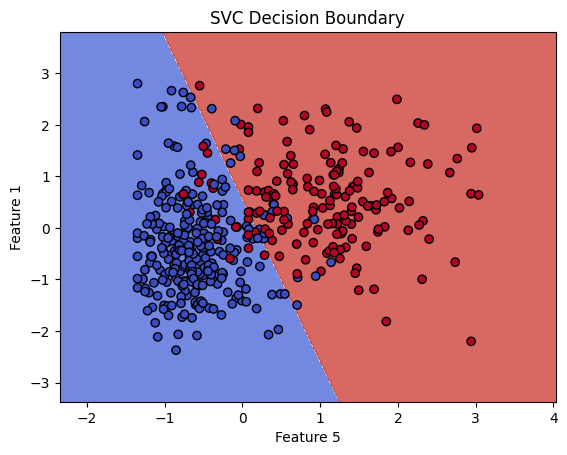

In [125]:
feature_1_index = efs_selected_features[3]  
feature_2_index = efs_selected_features [1] 

X_train_2d = X_train_selected[:, [feature_1_index, feature_2_index]]
X_test_2d = X_test_selected[:, [feature_1_index, feature_2_index]]

# reFit 
svc_model_2d = SVC(kernel='linear')  
svc_model_2d.fit(X_train_2d, y_train)

# Creating a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the grid
Z = svc_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(f'Feature {feature_1_index}')
plt.ylabel(f'Feature {feature_2_index}')
plt.title('SVC Decision Boundary')

plt.show()


## ACO with SVC classifier

In [158]:
def ant_colony_optimization(X, y, num_ants=5, num_features=5, max_iter=50, evaporation_rate=15, alpha=1, beta=2):
    num_features_total = X.shape[1]
    pheromones = np.ones(num_features_total)  # Initialize pheromones
    heuristic_info = np.var(X, axis=0)  

    best_features = []
    best_score = -np.inf
    
    for iteration in range(max_iter):
        all_solutions = []
        scores = []
        
        for ant in range(num_ants):
            # Probability calculation using pheromones and heuristic info
            probabilities = (pheromones ** alpha) * (heuristic_info ** beta)
            probabilities /= probabilities.sum()

            aco_selected_features = np.random.choice(range(num_features_total), num_features, replace=False, p=probabilities)
            all_solutions.append(aco_selected_features)
            
            # Evaluate the selected features using cross-validation
            X_selected = X[:, aco_selected_features]
            score = np.mean(cross_val_score(SVC(kernel = 'linear'), X_selected, y, cv=3))  
            
            scores.append(score)
            if score > best_score:
                best_score = score
                best_features = aco_selected_features

        # Update pheromones: Evaporation and Intensification
        pheromones *= (1 - evaporation_rate)  # Evaporation
        for i, solution in enumerate(all_solutions):
            pheromones[solution] += scores[i] / max(scores)  
    
    return best_features

# Apply the ACO
aco_selected_features = ant_colony_optimization(X.values, y.values, num_ants=5, num_features=5, max_iter=50, evaporation_rate=15)

# Convert the indices of the selected features back to feature names
selected_feature_names = X.columns[aco_selected_features]
print("Selected Features by ACO:")
print(selected_feature_names)

Selected Features by ACO:
Index(['area_worst', 'area_mean', 'perimeter_worst', 'texture_worst',
       'perimeter_mean'],
      dtype='object')


## Fitting SVM classifier with ACO selected features

In [159]:
X_train_selected = X_train_scaled[:, aco_selected_features]
X_test_selected = X_test_scaled[:, aco_selected_features]

# reFiting the Random Forest model with the best features
svm_model_aco = SVC(kernel = 'linear')
svm_model_aco.fit(X_train_selected, y_train)

y_pred_best = svm_model_aco.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best) * 100
precision_best = precision_score(y_test, y_pred_best) * 100
recall_best = recall_score(y_test, y_pred_best) * 100
f1_best = f1_score(y_test, y_pred_best) * 100

# Print metrics
print(f"Accuracy (Best Features): {accuracy_best:.2f}%")
print(f"Precision (Best Features): {precision_best:.2f}%")
print(f"Recall (Best Features): {recall_best:.2f}%")
print(f"F1-Score (Best Features): {f1_best:.2f}%")


Accuracy (Best Features): 95.61%
Precision (Best Features): 97.50%
Recall (Best Features): 90.70%
F1-Score (Best Features): 93.98%


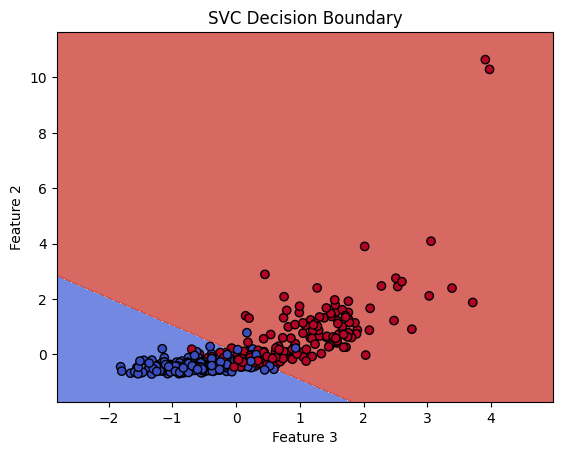

In [209]:
feature_1_index = aco_selected_features[1] 
feature_2_index = aco_selected_features [3]  

X_train_2d = X_train_selected[:, [feature_1_index, feature_2_index]]
X_test_2d = X_test_selected[:, [feature_1_index, feature_2_index]]

# refiting the SVC model on the two selected features
svc_model_2d = SVC(kernel='linear')  
svc_model_2d.fit(X_train_2d, y_train)

# Creating a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the grid
Z = svc_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(f'Feature {feature_1_index}')
plt.ylabel(f'Feature {feature_2_index}')
plt.title('SVC Decision Boundary')

plt.show()


In [153]:
aco_selected_features

array([23,  3, 13,  2, 22])

# Results

In [184]:
results = {
    'Method': ['EFS', 'EFS', 'EFS', 'EFS', 'ACO', 'ACO', 'ACO', 'ACO'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'] * 2,
    'Random Forest': [96.49, 97.56, 93.02, 95.24, 93.86, 97.37, 86.05, 91.36],
    'KNN': [96.49, 95.35, 95.35, 95.35, 94.74, 95.12, 90.70, 92.86],
    'SVM': [97.37, 97.62, 95.35, 96.47, 95.61, 97.50, 90.70, 93.98]
}

df_for_viz = pd.DataFrame(results)

In [185]:
df_for_viz

,Method,Metric,Random Forest,KNN,SVM
0,EFS,Accuracy,96.49,96.49,97.37
1,EFS,Precision,97.56,95.35,97.62
2,EFS,Recall,93.02,95.35,95.35
3,EFS,F1-Score,95.24,95.35,96.47
4,ACO,Accuracy,93.86,94.74,95.61
5,ACO,Precision,97.37,95.12,97.50
6,ACO,Recall,86.05,90.70,90.70
7,ACO,F1-Score,91.36,92.86,93.98


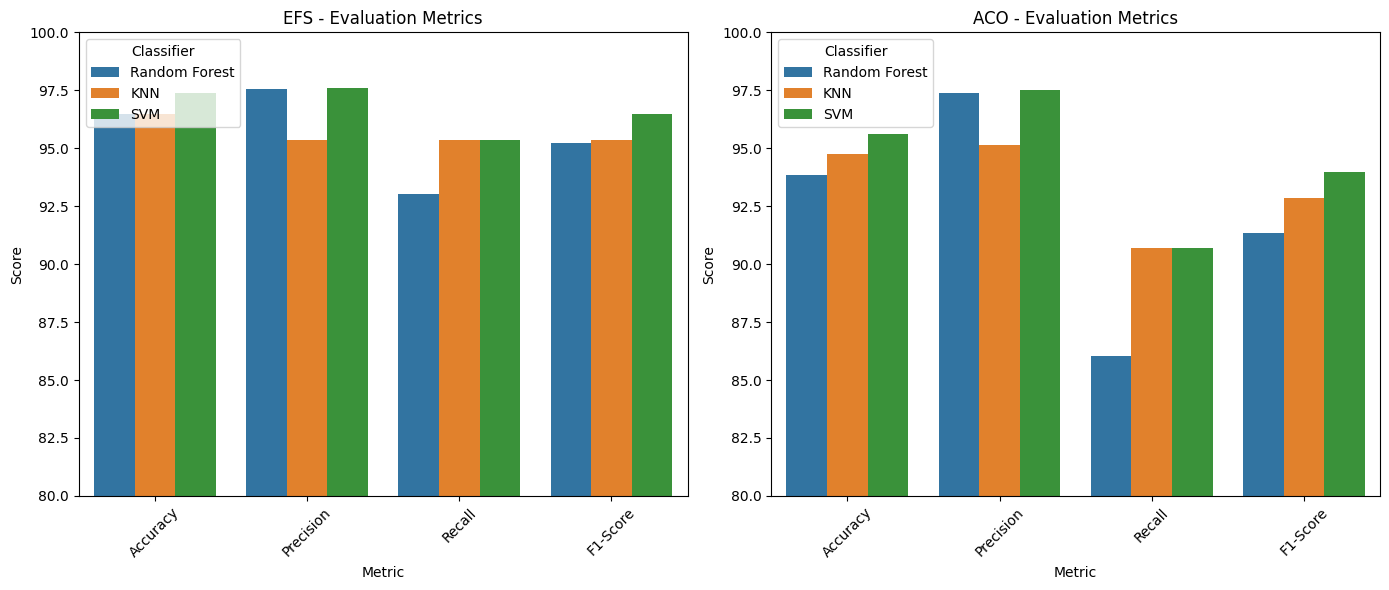

In [186]:
# Melting the DataFrame for plotting
df_melted = pd.melt(df_for_viz, id_vars=['Method', 'Metric'], var_name='Classifier', value_name='Score')

# Plot for EFS
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Metric', y='Score', hue='Classifier', data=df_melted[df_melted['Method'] == 'EFS'])
plt.title('EFS - Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(80, 100)
plt.xticks(rotation=45)
plt.legend(title='Classifier', loc='upper left')

# Plot for ACO
plt.subplot(1, 2, 2)
sns.barplot(x='Metric', y='Score', hue='Classifier', data=df_melted[df_melted['Method'] == 'ACO'])
plt.title('ACO - Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(80, 100) 
plt.xticks(rotation=45)
plt.legend(title='Classifier', loc='upper left')

plt.tight_layout()
plt.show()

From the result plotted above, The classifiers performed better under the evolutionary feature selection techniques with SVM classifier showing the highest accuracy score (97.37%). The precision scores across the two techniques with the three classifiers are approximately equal, but the results from the table shows that SVM classifier has the highest precision score of 97.62%. In terms of recall, KNN and SVM under the evolutionary feature selection technique exhibit the best ability in predicting the minority class (Malignant) shown with their equal recall score of 95.35%. Finally, SVM under the evolutionary feature selection attained the highest F1 score (93.98%), which is the harmonic mean of precision and recall.

**Conclusion**
While both evolutionary feature selection technique and the ant colony optimization shows their ability to eliminate unneccasary features, the two techniques attained meanignful level of accuracy, precision, recall and F1 score, despite the imbalance in the dataset. The evolutionary feature selection however, showed a better performance (Although it used more features) accross the three classifiers.

According to the SVM model with the evolutionary feature selection method, the important features to make 



Thank You!😊

# *Oladele Bidemi A.*
•ajayioladeleb@gmail.com